# COSC4426 - Group 'R' - Clustering Problem

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, MeanShift, SpectralClustering, AgglomerativeClustering
from sklearn.decomposition import PCA

sns.set_style('whitegrid')

## Parse and clean data

In [2]:
# Parse csv file
df = pd.read_csv('data/penguins.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [3]:
# Check for missing data - no-data rows are not included in count
df.count()

species              344
island               344
bill_length_mm       342
bill_depth_mm        342
flipper_length_mm    342
body_mass_g          342
sex                  333
dtype: int64

In [4]:
# Drop rows with missing data and confirm each column has same number of values
df.dropna(inplace=True)
df.count()

species              333
island               333
bill_length_mm       333
bill_depth_mm        333
flipper_length_mm    333
body_mass_g          333
sex                  333
dtype: int64

In [5]:
# Sort the data by species, then island, then sex. Reindex.
df.sort_values(['species','island','sex'], inplace=True, ascending=True)
df.reset_index(inplace=True, drop=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Biscoe,37.8,18.3,174.0,3400.0,FEMALE
1,Adelie,Biscoe,35.9,19.2,189.0,3800.0,FEMALE
2,Adelie,Biscoe,35.3,18.9,187.0,3800.0,FEMALE
3,Adelie,Biscoe,40.5,17.9,187.0,3200.0,FEMALE
4,Adelie,Biscoe,37.9,18.6,172.0,3150.0,FEMALE


## Explore descriptive statistics

In [6]:
# Basic statistics of the data set
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [7]:
# Basic statistics of the data set
print("Unique values: ", df['species'].unique())
df['species'].describe()

Unique values:  ['Adelie' 'Chinstrap' 'Gentoo']


count        333
unique         3
top       Adelie
freq         146
Name: species, dtype: object

In [8]:
# Basic statistics of the data set
print("Unique values: ", df['island'].unique())
df['island'].describe()

Unique values:  ['Biscoe' 'Dream' 'Torgersen']


count        333
unique         3
top       Biscoe
freq         163
Name: island, dtype: object

In [9]:
# Basic statistics of the data set
print("Unique values: ", df['sex'].unique())
df['sex'].describe()

Unique values:  ['FEMALE' 'MALE']


count      333
unique       2
top       MALE
freq       168
Name: sex, dtype: object

## Visualize dataset

In [10]:
# For reference - features will be the float values, indices 2 to 5 inclusive
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.3+ KB


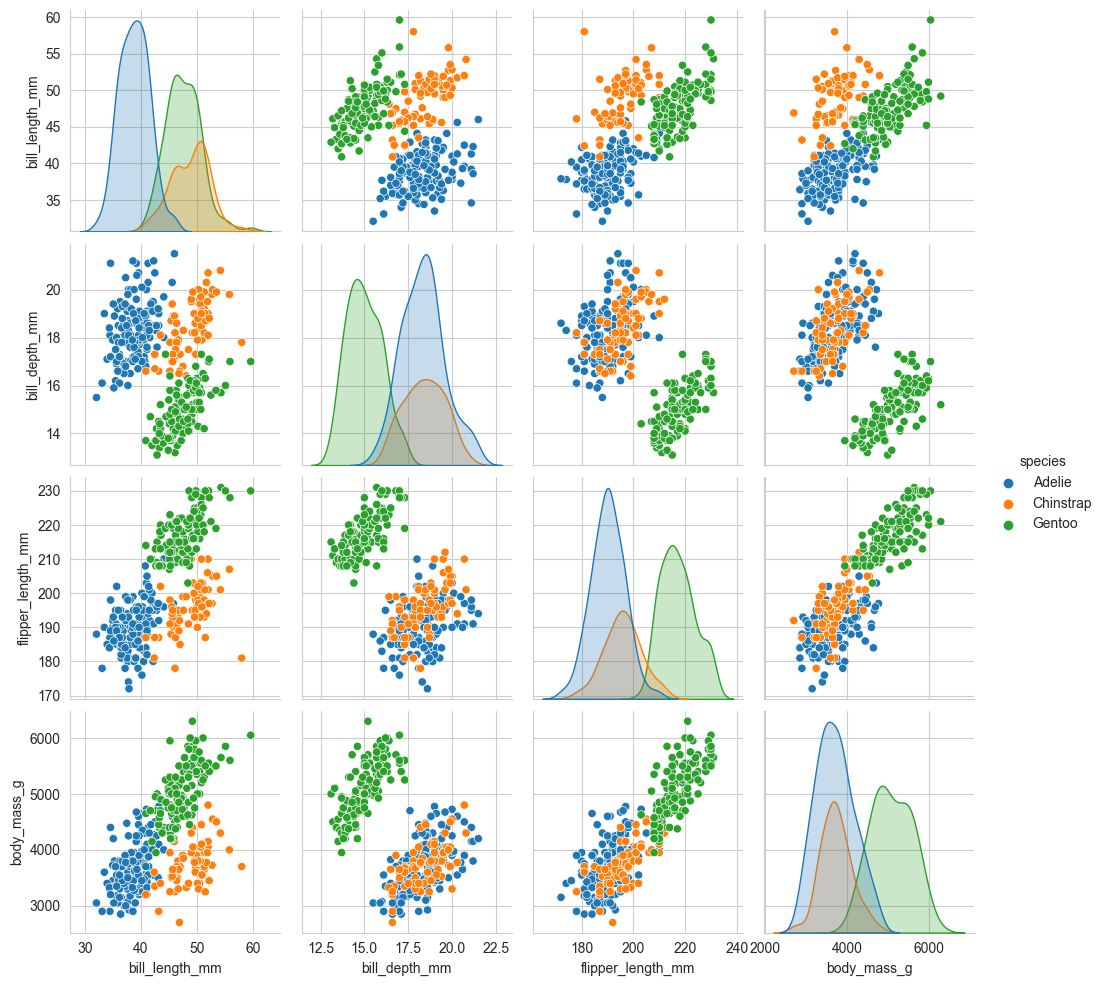

In [11]:
# Pair plots by species
sns.pairplot(df, vars=df.columns[2:6], hue='species')

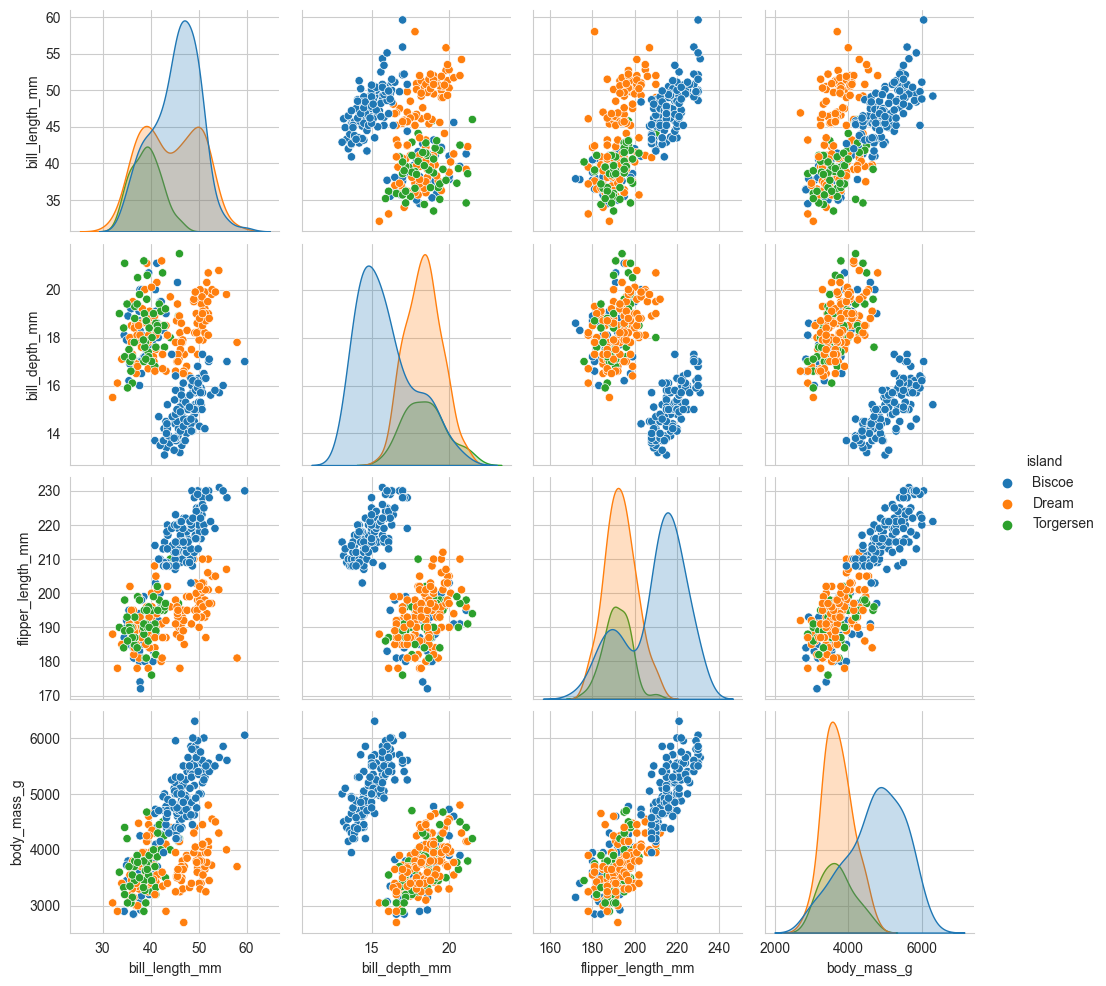

In [12]:
# Pair plots by island
sns.pairplot(df, vars=df.columns[2:6], hue='island')

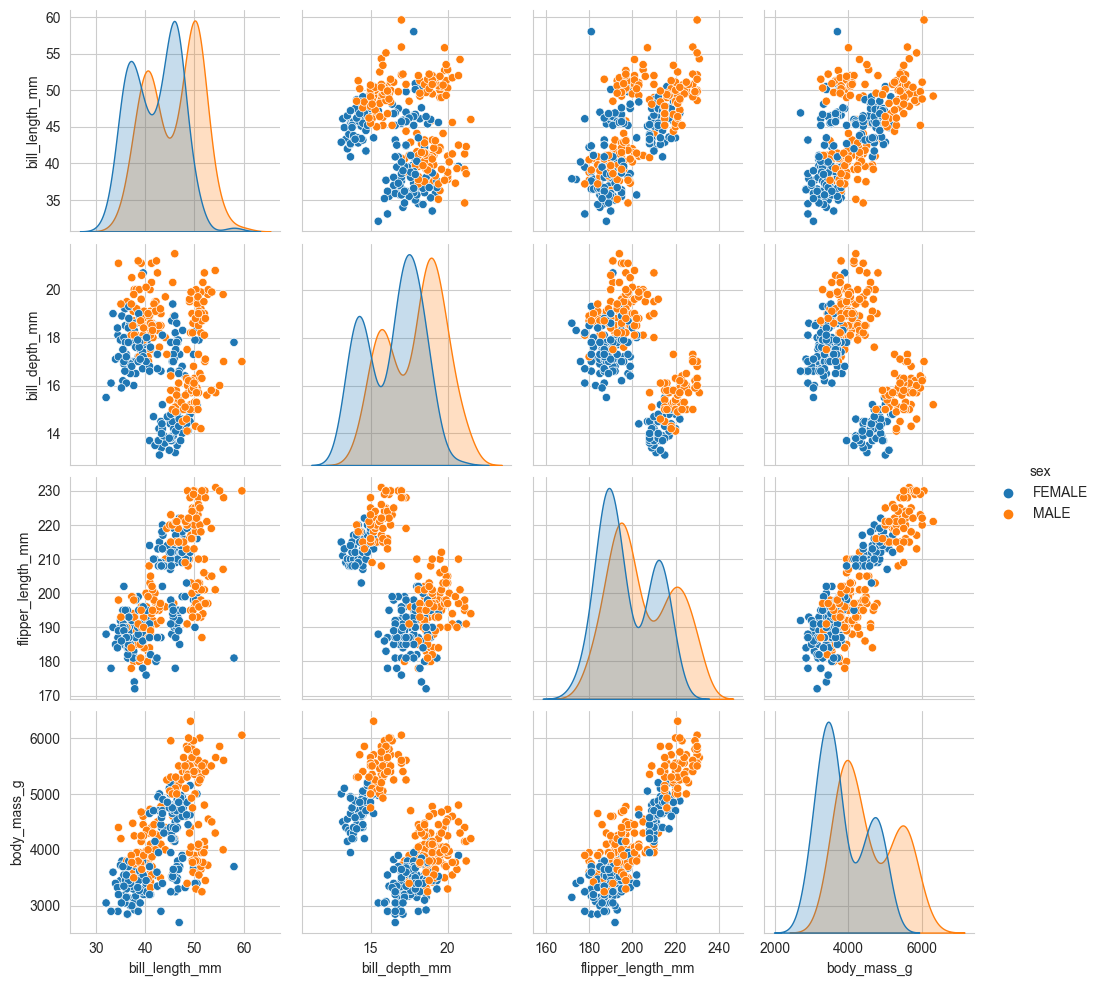

In [13]:
# Pair plots by sex
sns.pairplot(df, vars=df.columns[2:6], hue='sex')

## Cluster analysis

In [14]:
# Data to use for cluster analysis
data = df[df.columns[2:6]]
data.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,37.8,18.3,174.0,3400.0
1,35.9,19.2,189.0,3800.0
2,35.3,18.9,187.0,3800.0
3,40.5,17.9,187.0,3200.0
4,37.9,18.6,172.0,3150.0


### KMeans

In [15]:
# Create KMeans estimator
kmeans = KMeans(n_clusters=3, random_state=11)

In [16]:
# Train estimator with data
kmeans.fit(data)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=11)

In [17]:
# See how many of each specie there should be
n_adelie = df.species[df.species == 'Adelie'].count()
n_gentoo = df.species[df.species == 'Gentoo'].count()
n_chinstrap = df.species[df.species == 'Chinstrap'].count()

df.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [18]:
# Review how well KMeans algorithm clustered samples by species
specie_ranges = [
    ['Adelie', (0,n_adelie)],
    ['Chinstrap', (n_adelie, n_adelie+n_chinstrap)],
    ['Gentoo', (n_adelie+n_chinstrap, n_adelie+n_chinstrap+n_gentoo)]
]

for specie, r in specie_ranges:
    print(specie, '\n', kmeans.labels_[r[0]:r[1]])

Adelie 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 2 2
 2 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 2 1 2 2 1 2 1 1 1 2 2 2 2 2 2 1 1 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 1 2 2 2 1 1 1 1 2 2 2 1]
Chinstrap 
 [1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 1 2 1 1 2 1 2 2 2 1 2 2 1 1 2 2 1 1 2 1 2 1 1 2 1 2]
Gentoo 
 [2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0 0 0 2 1 2 2 2 0 2 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 0 2 2 0 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0]


### Principal Compononent Analysis

In [19]:
# Create PCA estimator
pca = PCA(n_components=2, random_state=11)

In [20]:
# Train estimator
pca = pca.fit(data.values)

In [21]:
# Reduce the dataset using the trained estimator
data_pca = pca.transform(data.values)

In [22]:
# Confirm shape of reduced dataset
data_pca.shape

(333, 2)

In [23]:
# Create new dataframe for reduced dataset
df_pca = pd.DataFrame(data_pca, columns=['Component1','Component2'])
df_pca.head()

,Component1,Component2
0,-807.392734,14.835748
1,-407.223110,7.654211
2,-407.255555,9.706808
3,-1007.159110,-1.470496
4,-1057.392038,12.787704


In [24]:
# Label the data with species
df_pca['species'] = df.species
df_pca.head()

,Component1,Component2,species
0,-807.392734,14.835748,Adelie
1,-407.223110,7.654211,Adelie
2,-407.255555,9.706808,Adelie
3,-1007.159110,-1.470496,Adelie
4,-1057.392038,12.787704,Adelie


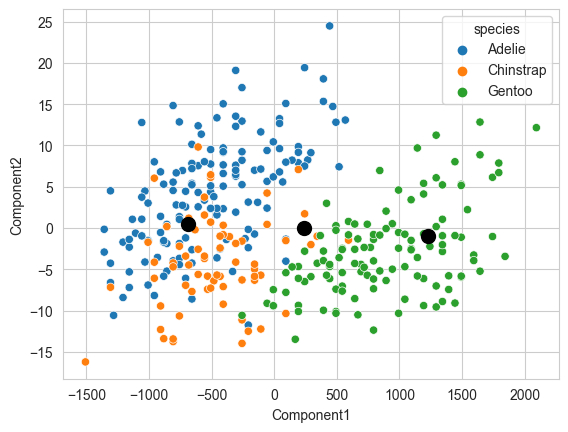

In [25]:
# Plot the cluster centroids of the reduced dataset
axes = sns.scatterplot(data=df_pca, x='Component1', y='Component2', hue='species', legend='brief')
specie_centers = pca.transform(kmeans.cluster_centers_)
dots = plt.scatter(specie_centers[:,0], specie_centers[:,1], s=100, c='k')

### Find the best cluster algorithm for the dataset

In [26]:
# Create alternative estimators
estimators = {
    'KMeans': kmeans,
    'DBSCAN': DBSCAN(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=3),
    'AgglomerativeClustering': 
        AgglomerativeClustering(n_clusters=3)
}

In [27]:
# Check performance of alternative estimators
for name, estimator in estimators.items():
     estimator.fit(data)
     print(f'\n{name}:')
     for specie, r in specie_ranges:
        labels, counts = np.unique(estimator.labels_[r[0]:r[1]], return_counts=True)
        print(f'{specie} ({r[0]}-{r[1]}):')
        for label, count in zip(labels, counts):
            print(f'   label={label}, count={count}')
             

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



KMeans:
Adelie (0-146):
   label=1, count=108
   label=2, count=38
Chinstrap (146-214):
   label=1, count=52
   label=2, count=16
Gentoo (214-333):
   label=0, count=70
   label=1, count=1
   label=2, count=48

DBSCAN:
Adelie (0-146):
   label=-1, count=146
Chinstrap (146-214):
   label=-1, count=68
Gentoo (214-333):
   label=-1, count=119

MeanShift:
Adelie (0-146):
   label=0, count=117
   label=1, count=29
Chinstrap (146-214):
   label=0, count=59
   label=1, count=9
Gentoo (214-333):
   label=0, count=1
   label=1, count=44
   label=2, count=74


/usr/local/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(



SpectralClustering:
Adelie (0-146):
   label=0, count=145
   label=2, count=1
Chinstrap (146-214):
   label=0, count=67
   label=1, count=1
Gentoo (214-333):
   label=0, count=119

AgglomerativeClustering:
Adelie (0-146):
   label=0, count=7
   label=1, count=93
   label=2, count=46
Chinstrap (146-214):
   label=0, count=2
   label=1, count=45
   label=2, count=21
Gentoo (214-333):
   label=0, count=103
   label=2, count=16
